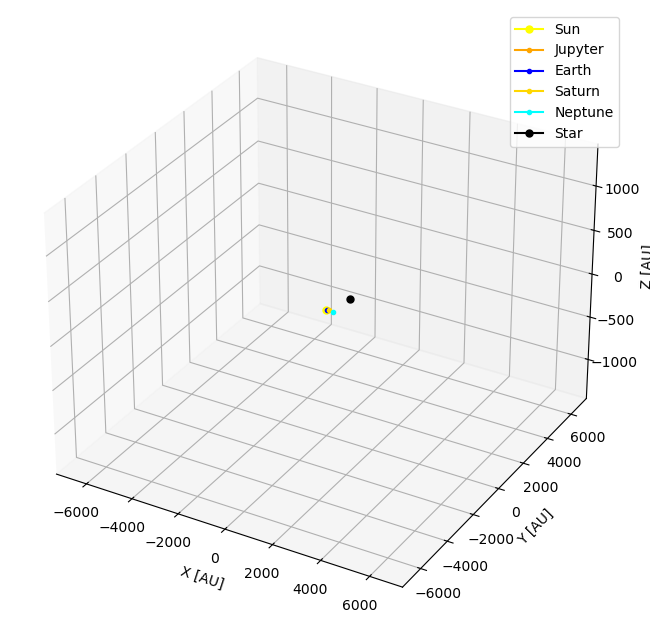

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D


positions = np.load('positions_history_direct.npy')[::100]
t_vals = np.load('time_history_direct.npy')[::100]
n_steps = t_vals.shape[0]
n_planets = 6

planet_names = ['Sun', 'Jupyter', 'Earth', 'Saturn', 'Neptune', 'Star']

colors_planets = ["yellow", "orange", "blue", 'gold', 'cyan', 'black']

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")

max_range = np.amax(positions) * .8
ax.set_xlim(-max_range, max_range)
ax.set_ylim(-max_range, max_range)
ax.set_zlim(-max_range/5, max_range/5)

ax.set_xlabel("X [AU]")
ax.set_ylabel("Y [AU]")
ax.set_zlabel("Z [AU]")


scatters = []
for i in range(n_planets):
    sc, = ax.plot([], [], [], marker="o", markersize=5 if i==0 or i==5 else 3,
                  color=colors_planets[i], label=planet_names[i])
    scatters.append(sc)

ax.legend()

def update(frame):
    for i, sc in enumerate(scatters):
        x, y, z = positions[frame, i]
        sc.set_data([x], [y])
        sc.set_3d_properties([z])
    return scatters

from matplotlib.animation import FFMpegWriter

writer = FFMpegWriter(fps=20, metadata=dict(artist='Me'), bitrate=1800)

ani = FuncAnimation(fig, update, frames=n_steps, interval=10., blit=False)
ani.save('solar_system_direct.mp4', writer=writer)

#plt.show()